# COGS 108 Final Project Proposal


# Overview
For this project we attempted to analyze and dig deeper into a various factors that might come into play when determining whether or not an individual takes stimulants, specifically Adderall (IR or XR). We began by utilizing a 2018 Drug and Health Survey and extracting only the columns we wanted to specifically look deeper into (as outlined below).
Initially, we looked at other drug use as a variable and performed an EDA on other drug use, and we also looked at demographic information separately. Similarly, we analyzed both dataframes (demographic + drug use) separately and together by using classifiers. 


## Names
<ul>
    <li>Steven Siddall</li>
    <li>Pramaan Gour</li>
    <li>Minjoo Kim</li>
    <li>Eric Kang</li>
    <li>Matthew Whiting</li>
</ul>


## Research Question
What (if any) effect do demographic factors such as ethnic group, age, sexual orientation have in determining whether or not an individual uses Adderall? What (if any) effect do prior drug usage/other drug usage have in determining whether or not an individual uses Adderall - and which of the two groups (demographic vs drug usage vs both combined) provide a more accurate determination in an individual's usage of Adderall?  


## Background and Prior Work
Adderall is a medication used to treat attention deficity hyperactivity disorder, or ADHD. It belongs to a class of drugs known as stimulants and is known for it's ability to help oneself pay attention, stay focused on an acitivity, and improve listening skills.

The side effects? Sleep disruption, serious cardiovascular side effects, high blood pressure, stroke, increased risk for mental health problems including depression, bipolar disorder, and hostile behavior.

However, often referred to as a "study drug," a plethora of young adults and professionals frequently abuse the drug. Combined with alcohol, Adderall can be deadly. (1) A study (2) that was done a couple years ago found that 24% of university students use Adderall, despite less than 9% of the students being prescribed the drug. This is concerning considering how high that number is given the dangerous nature of the drug; Adderall has been classified as a Schedule II drug by the DEA, which is defined as a drug with a 'high potential for abuse, with use potentially leading to several psychological or physical dependence'. 

Another study (3) done back in 2006 found that a much smaller percentage (7%) of students took the drug, however among those who took it, only about half of them said they did so in order to improve academic performance. That was 14 years ago. In a 2012 University of Maryland study, nearly 62% of students had been offered the drug, and half of that percentage admitted to trying them.(4) Similary a 2016 study stated that, despite the number of prescriptions for Adderall remaining steady over the years, if not fallen, misuse and emergency room visits have risen dramatically. A professor of mental health at the Bloomberg School, Ramin Mojtabai, stated that 'these drugs are used as study-aid medication to help students stay up all night and cram.'


One study (5) used Twitter mentions to measure students' Adderall use and found that certains areas had higher concentrations of mentions and, overall, mentions peaked around final exams.
This, combined with another study that stated 60% of nonmedical Adderall use was among 18-25 year olds, shows the glaring problem that Adderall usage is becoming increasingly common among young adults, specifically college students, and that is most likely linked to Adderall abuse for academic or working reasons (6).

<ol>
     <li>https://americanaddictioncenters.org/adderall/adderall-abuse-among-college-students <li>
    <li>https://www.michigandaily.com/section/research/adderall-used-24-university-students?fbclid=IwAR0j17N-nVtFxUwzQ6dNW3KsLxDnxk7R4SuHyuWXSXNh_Z7Av-HdfK28uEs</li>
    <li>https://rucore.libraries.rutgers.edu/rutgers-lib/38417/PDF/1/play/?fbclid=IwAR1Y32DbdyCZSeFMBqgET-yI3Vxz82rpvuzjLNwZqRJn1JYfp06hUWAS5vc</li>
    
   <li> https://www.psycom.net/adderall-college-students/ </li>

   <li>https://www.sciencedaily.com/releases/2013/05/130501145151.htm?fbclid=IwAR2-IJuV0ej_ZicNYvjx0HS_gek47jA5Hp_iA76wuC8fFUzMNWy-fXYmQqc</li>
   <li>https://www.jhsph.edu/news/news-releases/2016/adderall-misuse-rising-among-young-adults.html</li>
</ol>

## Hypothesis
We predict that individuals who are in their late teens/early 20's who have been/are currently enrolled in a full time university would be most likely to be a user of Adderall. We are also assuming individuals who may be in marginalized/underserved communities or ethnic groups may be at a higher risk of utilizing academic performance enhancing drugs due to the pressure that higher education may place on them to succeed. 

We believe this hypothesis because the amount of evidence and recent studies which highlight the growth in Adderall usage in young working/college adults, and we are aware that minority demographics are more susceptible to drug use due to outside variables (low income, pressure to succeed, etc). 


## Data

Dataset Name: National Survey Drug Use and Health 2018 NSDUH<br>
Dataset Link: https://www.datafiles.samhsa.gov/study-dataset/national-survey-drug-use-and-health-2018-nsduh-2018-ds0001-nid18758<br>
Documentation/Codebook: http://samhda.s3-us-gov-west-1.amazonaws.com/s3fs-public/field-uploads-protected/studies/NSDUH-2018/NSDUH-2018-datasets/NSDUH-2018-DS0001/NSDUH-2018-DS0001-info/NSDUH-2018-DS0001-info-codebook.pdf<br>

This dataset is a national survey for U.S. civilians, in a non-institutional population of age 12 or older. There are a total of 56313 rows in the dataset and over 2500 columns. These rows include data on the individual's prior drug use, as well as frequency, how long ago they used the drugs, etc, demographic data, personal data on the individual's youth, and mental illness. Although there is an abundance of data, ecause the dataset is such a large size, we have trimmed down the columns to focus on our areas of interest: demographic information as well as previous information such as drug usage. 

Sections of interest:
<ul>
    <li>Adderall usage: STMNMLAST p. 130 </li>
</ul>



## Setup


In [58]:
import pandas as pd
import seaborn as sns
import copy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import StratifiedKFold

# Data Wrangling and EDA and Analysis
In this section, we applied basic data cleaning techniques on our dataset (as we will explain throughout in comments and visualized our data as well). To begin with, we only extracted specific columns we wished to look at (the entire dataset had over 2500+ columns). These columns are outlined below

In [6]:
cols = ['CIGEVER', 'SMKLSSEVR', 'ALCEVER', 'MJEVER', 'COCEVER', 'CRKEVER', 'HEREVER', 'LSD', 'AMYLNIT', 'METHAMEVR', 'PNRANYLIF', 'TRQANYLIF',
            'STMANYLIF', 'SEDANYLIF', 'STMNMLAS1', 'AGE2', 'NEWRACE2', 'EDUHIGHCAT', 'SEXIDENT', 'IRSEX', 'WRKDHRSWK2', 'EDUSCHLGO',
            'EDUSCHGRD2', 'COLLENRLFT', 'DIFFHEAR', 'DIFFSEE', 'STMNMLAS1', 'SEXRACE', 'SPEAKENGL', 'SEXATRACT', 'CELLWRKNG', 'COLLENRLST','IRWRKSTAT','INCOME']
df = pd.read_csv("NSDUH_2018_Tab.tsv", usecols =cols, sep='\t')

In [7]:
df.isna().sum()

CIGEVER        0
SMKLSSEVR      0
ALCEVER        0
MJEVER         0
COCEVER        0
CRKEVER        0
HEREVER        0
LSD            0
AMYLNIT        0
METHAMEVR      0
PNRANYLIF      0
TRQANYLIF      0
STMANYLIF      0
SEDANYLIF      0
STMNMLAS1      0
AGE2           0
SEXATRACT      0
SEXIDENT       0
SPEAKENGL      0
DIFFHEAR       0
DIFFSEE        0
IRSEX          0
NEWRACE2       0
SEXRACE        0
EDUHIGHCAT     0
EDUSCHLGO      0
EDUSCHGRD2     0
COLLENRLFT    70
COLLENRLST    70
WRKDHRSWK2     0
IRWRKSTAT      0
CELLWRKNG      0
INCOME         0
dtype: int64

In [8]:
df.loc[df['COLLENRLFT'].isna()].head()

CIGEVER  SMKLSSEVR  ALCEVER  MJEVER  COCEVER  CRKEVER  HEREVER  LSD  \
551         2          2        1       2        2       91        2   91   
1580        1          1        1       1        2       91        2   91   
4023        2          2        2       2        2       91        2   91   
4359        1          2        1       1        2       91        2   91   
5874        1          1        1       1        1        2        2    2   

      AMYLNIT  METHAMEVR  ...  SEXRACE  EDUHIGHCAT  EDUSCHLGO  EDUSCHGRD2  \
551        91          2  ...        4           3         97          98   
1580       91          2  ...        5           2         97          98   
4023       91          2  ...        5           2         97          98   
4359       91          2  ...        3           2         97          98   
5874       91          2  ...        1           3         94          98   

      COLLENRLFT  COLLENRLST  WRKDHRSWK2  IRWRKSTAT  CELLWRKNG  INCOME  
551          NaN         NaN          32          2          1       1  
1580         NaN         NaN         997          4          1       2  
4023         NaN         NaN         997          4          1       1  
4359         NaN         NaN         999          3          1       2  
5874         NaN         NaN         998          2          1       1  

[5 rows x 33 columns]

According to the Codebook, an Null value is given to COLLENRLFT, and COLLENRLST (two questions asking about full time/part time/ no time enrollment in college if the respondents did not know, refused to answer, or left blank. Because of these reasons, and because it is such a small part of our dataset, we chose to drop these values.

In [9]:

df = df.dropna()

After we imported all the columns we wished to use, the first thing we did it split it into two tables, which we will be looking at separately and then together. The table below is for previous drug use, which may be helpful in determining who is more likely to utilize Adderall.

These are the columns and their meanings: <br>
If the value was:<br>
<b>1: </b>Yes<br>
<b>2:</b> No<br>
<b>3:</b> Yes (Logically assigned)<br>
<b>85:</b> BAD DATA<br>
<b>91:</b> NEVER USED (EG: for LSD, the question was asking if this person used LSD specifically, 91 would mean they have never used any hallucinogen, as LSD is a type of hallucinogen)<br>
<b>94:</b> Don't know<br>
<b>97: </b>Refused to answer<br>

For our cleaning, we manually went through each column and took out logically assigned data or bad data.

<b>CIGEVER:</b> Has this person ever smoked cigarettes in their lifetime? <br>
<b>SMKLSSEVR:</b> Has this person ever used smokeless tobacco?  <br>
<b>ALCEVER:</b> ... had an alcoholic beverage?  <br>
<b>MJEVER:</b> ... had marijuana? <br>
<b>COCEVER:</b> ... had cocaine? <br>
<b>CRKEVER:</b> ... had crack?<br>
<b>HEREVER:</b> Heroine<br>
<b>LSD: </b>Acid <br>
<b>AMYLNIT:</b>Inhalants<br>
<b>METHAMEVR:</b> Methaphatamines <br>
<b>PNRANYLIF:</b> Pain Killers <br>
<b>TRQANYLIF:</b> Tranquilizers<br>
<b>STMANYLIF:</b> Stimulant Use *This column was used in our EDA but ignored in our analysis because Adderall fell under 'Stimulant'; whether or not an individual used adderall in this study was found via a follow up question from their answer to Stimulant Use<br>
<b>SEDANYLIF:</b> Sedative Use<br>
<b>STMNMLAS1:</b> This is the column we are trying to predict, it is the last stimulant used not directed by a doctor in the past 12 months. 1: Adderall and 2 for Adderall XR, any other number was not indicative of specifically Adderall use and was cleaned for the purpose of this project<br>

In [10]:
drugdf = df[['CIGEVER', 'SMKLSSEVR', 'ALCEVER', 'MJEVER', 'COCEVER', 'CRKEVER', 'HEREVER', 'LSD', 'AMYLNIT', 'METHAMEVR', 'PNRANYLIF', 'TRQANYLIF',
            'STMANYLIF', 'SEDANYLIF', 'STMNMLAS1']]

drugdf.head()

CIGEVER  SMKLSSEVR  ALCEVER  MJEVER  COCEVER  CRKEVER  HEREVER  LSD  \
0        1          2        1       2        2       91        2   91   
1        2          2        1       2        2       91        2   91   
2        1          2        1       1        2       91        2    2   
3        2          2        1       2        2       91        2   91   
4        2          2        1       2        2       91        2   91   

   AMYLNIT  METHAMEVR  PNRANYLIF  TRQANYLIF  STMANYLIF  SEDANYLIF  STMNMLAS1  
0       91          2          2          2          2          2         91  
1       91          2          5          2          5          2         91  
2       91          2          5          2          5          2          1  
3       91          2          5          5          2          2         91  
4       91          2          2          2          2          2         91

One of our biggest issues with the dataset was that it was a voluntary survey, and it was a survey with 'bad data,' as marked by the surveyors (NSDA). Because this section was on drug use, which lead to some issues. First,  individuals may not be completely truthful of their drug addictions or past and there were issues with the data collection process. As stated above, some answers such as 85 were 'BAD DATA,' some such as 94 or 97 had individuals refusing to answer or didn't know, and such. To clean our dataset, we individually went through each of these columns, and looked at what values we deemed okay to drop. Often times, because the issues with data collection and bad data were so small (only several rows out of 56000+, we felt comfortable enough to drop these, as shown below.)

In [11]:
drugdf['ALCEVER'].value_counts() 


1     40390
2     15828
94       13
97        8
85        4
Name: ALCEVER, dtype: int64

In [12]:
drugdf['CRKEVER'].value_counts()


91    49586
2      5161
1      1468
97       17
98        8
94        3
Name: CRKEVER, dtype: int64

In [13]:
drugdf['LSD'].value_counts()

91    47903
1      4843
2      3443
94       42
97        8
3         3
85        1
Name: LSD, dtype: int64

In [14]:
drugdf['AMYLNIT'].value_counts()

91    50774
2      4391
1      1010
94       60
97        6
85        2
Name: AMYLNIT, dtype: int64

In [15]:
drugdf['TRQANYLIF'].value_counts()

2     45609
5      6326
1      3917
94      338
98       32
97       21
Name: TRQANYLIF, dtype: int64

In [16]:
drugdf['SEDANYLIF'].value_counts()

2     50274
1      3084
5      2583
94      264
97       22
98       16
Name: SEDANYLIF, dtype: int64

In [17]:
drugdf = drugdf[drugdf.ALCEVER != 85] 
drugdf = drugdf[drugdf.CRKEVER != 98]
drugdf = drugdf[drugdf.LSD != 3]
drugdf = drugdf[drugdf.AMYLNIT != 85]
drugdf = drugdf[drugdf.TRQANYLIF != 98]
drugdf = drugdf[drugdf.SEDANYLIF != 98] #Null
drugdf = drugdf[drugdf.SEDANYLIF != 5] #logically assigned

In [18]:
drugdf['STMNMLAS1'] #this is specifically Adderall usage

0        91
1        91
2         1
3        91
4        91
5        91
6        91
7        91
8         2
9        91
10       91
11       91
12       91
13       91
14        2
15       91
16       91
17       91
18       91
19        1
20       91
21       91
22       93
23       91
24       91
25       91
26       91
27       91
28       91
29       91
         ..
56283    91
56284    91
56285    91
56286    91
56287     1
56288    91
56289    91
56290    91
56291    91
56292    91
56293    91
56294    91
56295    91
56296    91
56297    91
56298    91
56299    91
56300    91
56301    91
56302    91
56303    91
56304    91
56305    91
56306    91
56307    91
56308    91
56309    91
56310    91
56311    91
56312    91
Name: STMNMLAS1, Length: 53621, dtype: int64

In [19]:
drugdf['STMANYLIF'].value_counts()

2     46899
5      3986
1      2522
94      190
97       21
98        3
Name: STMANYLIF, dtype: int64

In [20]:
drugdf = drugdf[drugdf.STMANYLIF != 98] #Null


This function is used on the last column of each dataset, which is what we will try to be predicting. Both 1 and 2 in the column is Adderall IR and Adderall XR, respectively, so this function will return 1 if any form of adderall is used by the individual, 0 if not.

In [21]:

def clean_adderall(x):
    if x == 1:
        return 1
    if x == 2:
        return 1
    else:
        return 0

In [22]:
df = df.copy()

In [23]:
drugdf['STMNMLAS1'] = df['STMNMLAS1'].apply(clean_adderall)

In [24]:
drugdf['STMNMLAS1'].sum()

1029

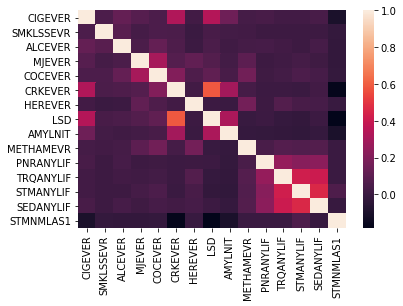

In [25]:
sns.heatmap(drugdf.corr())

We just used a simple heatmap if there were any blatant correlations between Adderall use and any other drug. Although we can see some correlation between other drugs (eg. LSD and Crack, Stimulants and Sedatives, etc), it was hard to determine if any other drug had a strong correlation with Adderall usage. 

To get a better look at the data, we performed a super rough clean on the dataset. This function would simply have 1 if that drug was ever taken, 0 if it was not. We chose to attempt to clean it like this because there were many other variables because of the method of data collection, eg: 'don't knows,' 'logically assigned Yes,' 'logically assigned No,' etc. This rough clean would simply look to see if that drug was used, and we could see if Adderall users had a history of using other drugs.

In [26]:
def rough_clean(x):
    if x == 1:
        return 1
    else:
        return np.NaN

In [27]:
drugdf.columns[:-1]

Index(['CIGEVER', 'SMKLSSEVR', 'ALCEVER', 'MJEVER', 'COCEVER', 'CRKEVER',
       'HEREVER', 'LSD', 'AMYLNIT', 'METHAMEVR', 'PNRANYLIF', 'TRQANYLIF',
       'STMANYLIF', 'SEDANYLIF'],
      dtype='object')

In [28]:
def clean_adderall_mod(x):
    if x == 1:
        return 1
    if x == 2:
        return 1
    else:
        return np.NaN

In [29]:
def make_rough():
    roughdf = []
    for i in drugdf.columns[:-1]:
        roughdf.append(drugdf[i].apply(rough_clean))
    roughdf = pd.DataFrame(roughdf).T
    roughdf['ADDERALL'] = drugdf['STMNMLAS1'].apply(clean_adderall_mod)
    return roughdf
    

In [30]:
roughdf = make_rough()

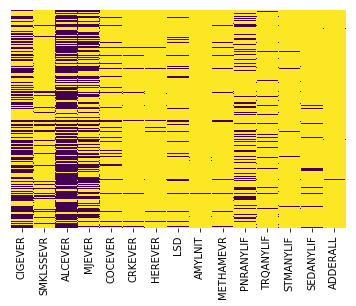

In [31]:
sns.heatmap(roughdf.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Similarly to our correlation from early, we can't really see a correlation between Adderall users and other drugs - however, this visualization does point out something key: the amount of Adderall Users in this study is very low. 

In [32]:
addUsers = df[df["STMNMLAS1"] == 1]
nonAddUsers = df[df["STMNMLAS1"] != 1]

In [33]:
def drug_visualization(colname):
    addUsers = df[df["STMNMLAS1"] == 1]
    nonAddUsers = df[df["STMNMLAS1"] != 1]
    coladd = addUsers[colname].value_counts(normalize = True)
    collnonadd = nonAddUsers[colname].value_counts(normalize = True)
    colloverall = df[colname].value_counts(normalize = True)
    colladd = pd.concat([coladd, collnonadd, colloverall], axis = 1)
    colladd.columns = ['Adderall users', 'non-adderall users', 'overall']
    plot = colladd.plot.bar()
    plot.set_xlabel("Value (See Markdown Above)")
    plot.set_ylabel("Normalized Value Count")


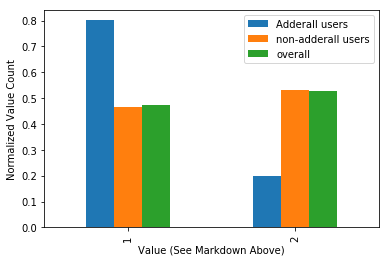

In [34]:
#Cigarette Users V.S. Adderall USers
drug_visualization('CIGEVER') 

Because Adderall is known to be specifically mixed with Alcohol for it's effects, we decided to look at them together. Although non-adderall users were quite even in drinking/not drinking, we see that around 80% of Adderall users drink as well.

For reference for each of the meanings of these numbers, we will instead refer you to the specific page number in the codebook. In our EDA however, we have specified what each value means <br>
<b>AGE2:</b> Age of respondent (p. 549) <br>
<b>NEWRACE2:</b> Race (p. 556) <br>
<b>EDUHIGHCAT:</b> Highest level of education <br>
<b>SEXIDENT:</b> Sexual Identity (p. 550)<br>
<b>IRSEX:</b> Gender (p. 554)<br>
<b>WRKDHRSWK2:</b> Hours worked last week (p. 562)<br>
<b>EDUSCHLGO:</b> Going to School (p. 557)<br>
<b>EDUSCHGRD2:</b> What level of education currently (p. 557)<br>
<b>COLLENRLFT:</b> Full time enrollment in college (p. 561)<br>
<b>DIFFHEAR:</b>  Difficulty Hearing (p. 552)<br>
<b>DIFFSEE:</b> Difficulty Seeing (p. 552)<br>
<b>SEXRACE: </b> Combined Gender + Race indicator (p. 556)<br>
<b>SPEAKENGL: </b> How well speak english (p. 552)<br>
<b>SEXATRACT: </b> Sexual Attraction (p. 552)<br>
<b>CELLWRKING: </b> Working Cell Phone (p. 580)<br>
<b> COLLENRLST: </b> Full or Part time student (p. 561)<br>
<b> IRWRKSTAT: </b> Employment Status (p. 561)<br>
<b> INCOME: </b> Income (p. 582)<br>
<b>STMNMLAS1</b>: Usage of Adderall (p. 91)<br>

In [35]:
demodf = df[['AGE2', 'NEWRACE2', 'EDUHIGHCAT', 'SEXIDENT', 'IRSEX', 'WRKDHRSWK2', 'EDUSCHLGO',
            'EDUSCHGRD2', 'COLLENRLFT', 'DIFFHEAR', 'DIFFSEE', 'SEXRACE', 'SPEAKENGL', 'SEXATRACT', 'CELLWRKNG', 'COLLENRLST','IRWRKSTAT','INCOME','STMNMLAS1']]
demodf.head()

AGE2  NEWRACE2  EDUHIGHCAT  SEXIDENT  IRSEX  WRKDHRSWK2  EDUSCHLGO  \
0    16         1           2         1      2          30          2   
1    12         1           4         1      2          55          2   
2     8         7           2         3      2          15          1   
3    15         1           3         1      2         999          2   
4    15         7           1         1      1          30          2   

   EDUSCHGRD2  COLLENRLFT  DIFFHEAR  DIFFSEE  SEXRACE  SPEAKENGL  SEXATRACT  \
0          99         3.0         2        2        2          1          1   
1          99         3.0         2        2        2          1          1   
2           9         1.0         2        2        6          1          3   
3          99         3.0         2        2        2          1          1   
4          99         3.0         2        2        5          3          6   

   CELLWRKNG  COLLENRLST  IRWRKSTAT  INCOME  STMNMLAS1  
0          1         5.0          1       3         91  
1          1         5.0          1       2         91  
2          1         1.0          2       4          1  
3          1         5.0          4       2         91  
4          2         5.0          1       2         91

In [36]:
demodf = demodf.copy()

In [37]:
demodf['STMNMLAS1'] = demodf['STMNMLAS1'].apply(clean_adderall)

In [38]:
addUsers = df[df["STMNMLAS1"] == 1]
nonAddUsers = df[df["STMNMLAS1"] != 1]

# this function will generate a graph comparing normalized value counts for a given variable between adderall users and the overall population
# i.e. "what percentage of adderall users/non adderall users/whole population fall into each value for the specified column?"
def compAdderallOverall(colname):
    coladd_vc = addUsers[colname].value_counts(normalize=True)
    colnonadd_vc = nonAddUsers[colname].value_counts(normalize=True)
    coloverall_vc = df[colname].value_counts(normalize=True)
    
    coladd = pd.concat([coladd_vc, colnonadd_vc, coloverall_vc], axis=1)
    coladd.columns = ["Adderall users", "Non-Adderall Users", "Overall"]
    plot = coladd.plot.bar()
    plot.set_xlabel("Value (See Markdown)")
    plot.set_ylabel("Normalized Value Count")

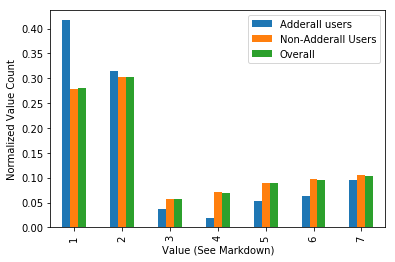

In [39]:
compAdderallOverall("SEXRACE")

<b>SEXRACE Values</b><br>
1 = Male, White, Not Hisp<br>
2 = Female, White, Not Hisp<br>
3 = Male, Black, Not Hisp<br>
4 = Female, Black, Not Hisp<br>
5 = Male, Hispanic<br>
6 = Female, Hispanic<br>
7 = Male or Female, Other Races <br>

This graph shows the breakdown of race and sex in the data set. We can see that 40% of adderall users are white males, despite being only around 25% of overall users of the dataset. We also see that black and hispanic members of the dataset tend to stay away from adderall.

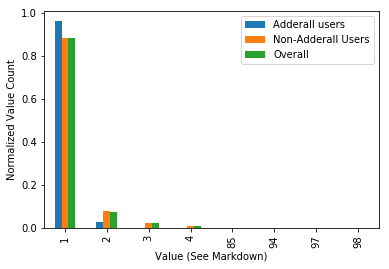

In [40]:
compAdderallOverall("SPEAKENGL")

<b>SPEAKENGL Values</b><br>
HOW WELL DO YOU SPEAK ENGLISH<br>
1 = Very well<br>
2 = Well<br>
3 = Not well<br>
4 = Not at all<br>
85 = BAD DATA Logically assigned <br>
94 = DON'T KNOW<br>
97 = REFUSED <br>
98 = BLANK (NO ANSWER)<br>

This graph shows that almost all of the adderall users are English speakers. The dataset is also a majority English speaking. Depsite this, a higher percentage of English speakers user adderall when compared with non-English speakers. 

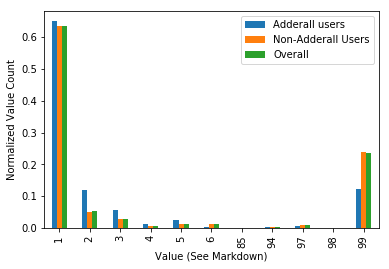

In [41]:
compAdderallOverall("SEXATRACT")

<b>SEXATRACT Values</b><br>
1 = I am only attracted to opposite sex<br>
2 = I am mostly attracted to opposite sex<br>
3 = I am equally attracted to males and females<br>
4 = I am mostly attracted to same sex <br>
5 = I am only attracted to same sex<br>
6 = I am not sure <br>
85 = BAD DATA Logically assigned<br>
94 = DON'T KNOW<br>
97 = REFUSED<br>
98 = BLANK (NO ANSWER) <br>
99 = LEGITIMATE SKIP

In this graph we see that the answers for 2 (I am mostly attracted to opposite sex), 3(I am equally attracted to males and females) and 5(I am only attracted to same sex) make up a disproportionate percentage of adderall users. Idividuals who identify as straight are almost equally represented in the overall users and the adderall users percentages. 99 were individuals who skipped the question, which could be due to an age under 18 or some other reasons. 

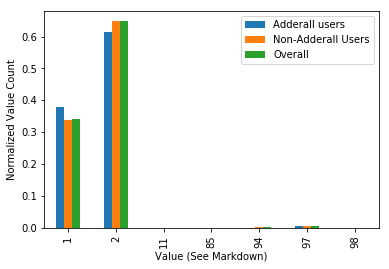

In [42]:
compAdderallOverall("EDUSCHLGO")

<b>EDUSCHLGO Values</b><br>
NOW GOING TO SCHOOL<br>
1 = Yes<br>
2 = No<br>
11 = Yes <br>
85 = BAD DATA Logically assigned <br>
94 = DON'T KNOW<br>
97 = REFUSED<br>
98 = BLANK (NO ANSWER)

Here we can see that students make up a slighly higher % of adderall users proportionate to their overall representation in the dataset. Opposite to this we see that non-students have a slightly lower proportion of adderall users than their representation in the dataset.

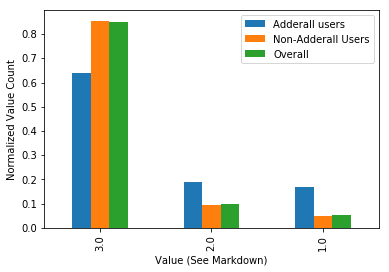

In [43]:
compAdderallOverall("COLLENRLFT")

<b>COLLENRLFT Values</b><br>
RC-COLLEGE ENROLLMENT-FULL TIME<br>
1 = Full Time College Student Aged 18-22<br>
2 = Other Persons Aged 18-22 <br>
3 = Persons Aged 12-17, 23 or Older

This shows us that there is a large percentage of 18-22 year olds which have used adderall recently when compared to other ages groups. However there is quite a difference between the repsonse rate for the 1.0 group (Full time college students) and the 2.0 (Not full time). Both have a disproportionate representation in the adderall users group, however the overall amount of full time college students is lower than the non college students which are aged 18-22. Despite this difference, the differnce in the blue bars (% of Adderall users) is minimal. This tells us that of the 18-22 year olds, there is a larger % of full time college students. 

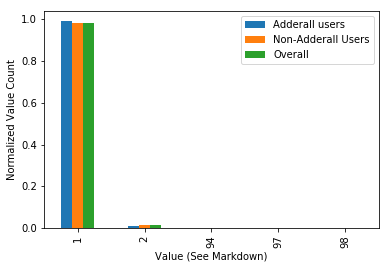

In [44]:
compAdderallOverall("CELLWRKNG")

<b>CELLWRKNG Values</b><br>
WORKING CELL PHONE<br>
1 = Yes<br>
2 = No<br>
94 = DON'T KNOW<br>
97 = REFUSED<br>
98 = BLANK (NO ANSWER)<br>

This graph shows us that the percentage of adderall users is slightly higher when they have a working phone. It really doesn't give us much information. We were hoping to see something about income, but this was the best variable we could find.

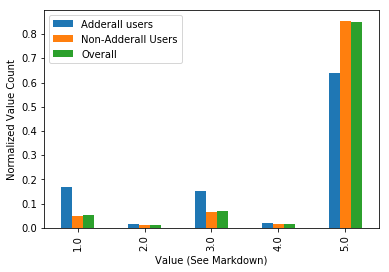

In [45]:
compAdderallOverall("COLLENRLST")

<b>COLLENRLST Values</b><br>
RC-COLLEGE ENROLLMENT<br>
1 = Full Time College Student Aged 18-22<br>
2 = Part Time College Student Aged 18-22<br>
3 = Not Enrolled Aged 18-22<br>
4 = Other Persons Aged 18-22<br>
5 = Persons Aged 12-17, 23 or Older

This graph shows similar results to the previous, where people aged 18-22 have a higher tendency to use adderall, but those that are full time enrolled in college use it more often than those not enrolled. In this graph we can also see that part time students also have a higher chance of using adderall, but it is no where near as high as full time students.

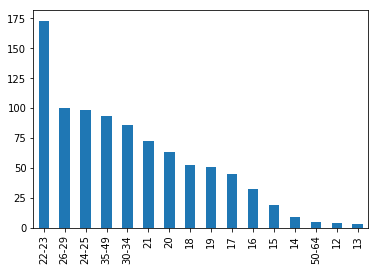

In [46]:
df_Add = df[df['STMNMLAS1'] == 1]
def transform_age(label):
    label = int(label)
    out = label
    codes = { 1:'12', 2 :'13', 3 :'14', 4 : '15', 5:'16', 6:'17', 7:'18', 8:'19', 9:'20', 10:'21', 11:'22-23',
                  12:'24-25', 13:'26-29',14:'30-34', 15:'35-49',16:'50-64', 17:'65+'}
    return codes.get(label)
ages= df_Add['AGE2'].apply(transform_age)
ages.value_counts().plot.bar()

This shows the amounts of adderall users split by age groups, the next graph which shows percentages is more useful for analysis.

Text(0, 0.5, '% that use Adderall')

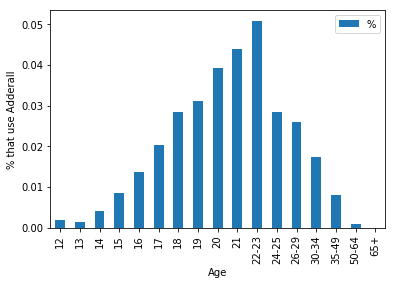

In [47]:

#lets find the % of users which use adderall in each age group
amounts = ages.value_counts().to_dict()
allAges = df['AGE2'].apply(transform_age).value_counts().to_dict()
allAges
percentages = {}
for key in allAges:
    try:
        use_value = int(amounts.get(key))
    except TypeError:
        use_value = 0
    
    percentages[key] = use_value / int(allAges.get(key))

df_perc = pd.DataFrame.from_dict(percentages, orient='index', columns=['%'])
df_perc = df_perc.reindex(index = ['12','13','14','15','16','17','18','19','20','21','22-23','24-25','26-29',
                                  '30-34', '35-49', '50-64', '65+'])
chart = df_perc.plot.bar()
chart.set_xlabel("Age")
chart.set_ylabel("% that use Adderall")

# As we see in the graph, the % of drug users spikes in the age groups of college students, with the most prevelent
# being 19-23 years old  

We can see that the percentage of repsonses from the age groups forms a bell curve round 21 and 22. This shows that in the age groups of 19-23, an individual has the highest probability to use adderall. 

{10: 99, 11: 88, 9: 41}
{'2nd or 3rd': 2414, '4th+': 1953, '1st': 1743}
{'1st': 0.023522662076878944, '2nd or 3rd': 0.04101077050538525, '4th+': 0.04505888376856119}


Text(0, 0.5, '% that use Adderall')

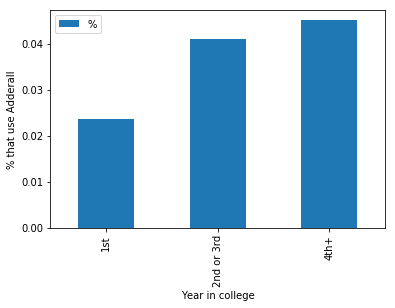

In [48]:
# % of those in college or have completed college which have used adderall

# EDUGRDNOW2 = 9 = 1st yr
#            10 = 2nd/3rd yr
#            11 = beyond
df_college_students = df[(df['EDUSCHGRD2']==9) | (df['EDUSCHGRD2']==10) | (df['EDUSCHGRD2']==11)]
df_college_students

def transform_grade(label):
    label = int(label)
    codes = { 9 :'1st', 10 :'2nd or 3rd', 11 :'4th+'}
    return codes.get(label)

# lets graph % of each level use adderall
addUsers = df_college_students[df_college_students['STMNMLAS1'] == 1]['EDUSCHGRD2']
countAUsers= addUsers.value_counts().to_dict()
print(countAUsers)
gradelevel = df_college_students['EDUSCHGRD2'].apply(transform_grade).value_counts().to_dict()
print(gradelevel)
percentages = {}
try:
    percentages['1st'] = int(countAUsers.get(9)) / int(gradelevel.get('1st'))
    percentages['2nd or 3rd'] = int(countAUsers.get(10)) / int(gradelevel.get('2nd or 3rd'))
    percentages['4th+'] = int(countAUsers.get(11)) / int(gradelevel.get('4th+'))
except TypeError:
    percentages = {}
    
print(percentages)

df_perc = pd.DataFrame.from_dict(percentages, orient='index', columns=['%'])
df_perc = df_perc.reindex(index = ['1st','2nd or 3rd','4th+'])
chart = df_perc.plot.bar()
chart.set_xlabel("Year in college")
chart.set_ylabel("% that use Adderall")



This shows us the breakdown of adderall users by percent in each year of college. We see that as college goes on, the proportion of adderall users rises. There is also  large jump from 1st year to 2nd/3rd year students, this could be because 1st year is generallly easier and the survey asks if you used adderall anytime in the pervious year. 

{'22-23': 119, '24-25': 74, '21': 29, '18': 28, '20': 27, '19': 18}


Text(0, 0.5, '% of non College Students that use Adderall')

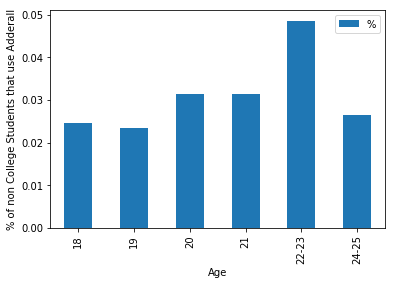

In [49]:
#to do: check non collegers
df_noncollege_students = df[(df['EDUSCHGRD2']!=9) & (df['EDUSCHGRD2']!=10) & (df['EDUSCHGRD2']!=11)]
df_noncollege_students = df_noncollege_students[(df_noncollege_students['AGE2'] == 7) | (df_noncollege_students['AGE2'] == 8) | (df_noncollege_students['AGE2'] == 9) |(df_noncollege_students['AGE2'] == 10) | (df_noncollege_students['AGE2'] == 11) | (df_noncollege_students['AGE2'] == 12)]   

amounts = df_noncollege_students[df_noncollege_students['STMNMLAS1'] ==1]['AGE2'].apply(transform_age).value_counts().to_dict()
print(amounts)
allAges = df_noncollege_students['AGE2'].apply(transform_age).value_counts().to_dict()
allAges
percentages = {}
for key in allAges:
    try:
        use_value = int(amounts.get(key))
    except TypeError:
        use_value = 0
    
    percentages[key] = use_value / int(allAges.get(key))

df_perc = pd.DataFrame.from_dict(percentages, orient='index', columns=['%'])
df_perc = df_perc.reindex(index = ['18','19','20','21','22-23','24-25'])
chart = df_perc.plot.bar()
chart.set_xlabel("Age")
chart.set_ylabel("% of non College Students that use Adderall")

Here we see the breakdown of percentage of non college students that user adderall, seperated by age groups. We see a slight rise in populatiry of adderall until the individual hits 24 and then it drops off to around the same amount as being 19. This shows that the further into the 18-23 age group an indiviudal gets, the more likely they are to use adderall. 

{'22-23': 54, '21': 43, '20': 36, '19': 33, '18': 24, '24-25': 24}


Text(0, 0.5, '% of College Students that use Adderall')

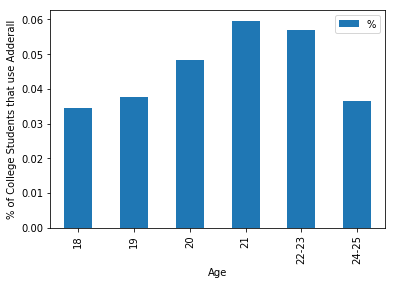

In [50]:
df_college_students = df[(df['EDUSCHGRD2']==9) | (df['EDUSCHGRD2']==10) | (df['EDUSCHGRD2']==11)]
df_college_students = df_college_students[(df_college_students['AGE2'] == 7) | (df_college_students['AGE2'] == 8) | (df_college_students['AGE2'] == 9) |(df_college_students['AGE2'] == 10) | (df_college_students['AGE2'] == 11) | (df_college_students['AGE2'] == 12)]   

amounts = df_college_students[df_college_students['STMNMLAS1'] ==1]['AGE2'].apply(transform_age).value_counts().to_dict()
print(amounts)
allAges = df_college_students['AGE2'].apply(transform_age).value_counts().to_dict()
allAges
percentages = {}
for key in allAges:
    try:
        use_value = int(amounts.get(key))
    except TypeError:
        use_value = 0
    
    percentages[key] = use_value / int(allAges.get(key))

df_perc = pd.DataFrame.from_dict(percentages, orient='index', columns=['%'])
df_perc = df_perc.reindex(index = ['18','19','20','21','22-23','24-25'])
chart = df_perc.plot.bar()
chart.set_xlabel("Age")
chart.set_ylabel("% of College Students that use Adderall")

#Overall increase compared to previous graph for those college students that are in the 20-21 age range

This graph has the percetage of college students that use adderall, broken up by age. This graph shows us that for every age group that is in college, the percentage of adderall users is higher when compared to non college students. Each age group increase by an average of around 1.5x. This shows that when the individual is in college, they have a signifcantly higher chance of doing adderall than non college students and an especially higher chance when comapred with a non college student who is older than 25 years old or less than 18 years old.

In [51]:
def income_rename(x):
    if x == 1: 
        return '< $20,000'
    elif x == 2:
        return '$20-40k'
    elif x == 3:
        return '$50-75k'
    else:
        return '75k+'

Text(0, 0.5, '% of People that use Adderall')

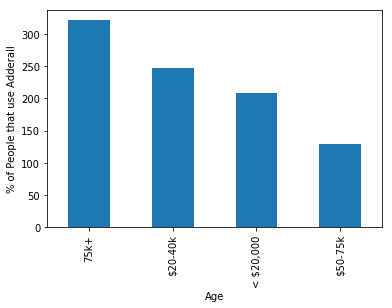

In [52]:
df_Add = df[df['STMNMLAS1'] == 1]
income= df_Add['INCOME'].apply(income_rename)
chart = income.value_counts().plot.bar()
chart.set_xlabel("Age")
chart.set_ylabel("% of People that use Adderall")



Interestingly, we see that most Adderall users have an income of 75+, then 20-40K, then less than 20k, then 50-70k. 

# Prediction

One of the benefits of this dataset was that the values were already imputed as numbers, which took out the need for us to transform the dataset.
Moreover, we tried multiple techniques for this classification.
Initially, we used SVM as a classification technique to see if previous drug use was indicative of whether or not an individual might use Adderall.

In [53]:
#SVM
def train_SVM(X,Y, kernel = 'linear'):
    model = SVC(kernel = kernel)
    model.fit(X,Y)
    return model

In [54]:
X = drugdf.drop(columns=['STMNMLAS1', 'STMANYLIF'], axis = 1)
y = drugdf['STMNMLAS1']

In [59]:
skf = StratifiedKFold(n_splits=3) #create cross-validator object

In [60]:
agg_f1 = 0
for i, j in skf.split(X, y): 
    X_train, X_test = X.iloc[i], X.iloc[j]
    y_train, y_test = y.iloc[i], y.iloc[j]
    svm = train_SVM(X_train, y_train)
    preds = svm.predict(X_test)
    agg_f1 += f1_score(y_test, preds, average='weighted')
print("F1 Score for SVM model is: {}".format(agg_f1/3))

F1 Score for SVM model is: 0.9713059942088567


In [61]:
print(classification_report(y_test, preds, zero_division=1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     17529
           1       1.00      0.00      0.00       343

    accuracy                           0.98     17872
   macro avg       0.99      0.50      0.50     17872
weighted avg       0.98      0.98      0.97     17872



As you can see, while the f1-score shown is relatively in range of our average f1 that we calculated in cell [58], the recall for 1-labeled units (adderall users) is zero, meaning that we have zero true positives. Let's investigate our trained model to see what we can find out.


In [62]:
train_preds = svm.predict(X_train)

In [63]:
print(classification_report(y_train, train_preds, zero_division=1)) #we did a classification report on the training data

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     35060
           1       1.00      0.00      0.00       686

    accuracy                           0.98     35746
   macro avg       0.99      0.50      0.50     35746
weighted avg       0.98      0.98      0.97     35746



So even for training we experience the same effect - the trained model cannot even find the adderall users on the train data, so it is unlikely that it will have any use on external datasets

Similarly, we did the same process to our demographic information, to see whether demographic information can be used to classify whether or not an individual is likely to take Adderall.

In [64]:
demoX = demodf.drop('STMNMLAS1', axis = 1)
demoY = demodf['STMNMLAS1']

In [65]:
skf = StratifiedKFold(n_splits=3) #create cross-validator object


In [66]:
agg_f1 = 0
for i, j in skf.split(demoX, demoY): 
    X_train, X_test = demoX.iloc[i], demoX.iloc[j]
    y_train, y_test = demoY.iloc[i], demoY.iloc[j]
    svm = train_SVM(X_train, y_train)
    preds = svm.predict(X_test)
    agg_f1 += f1_score(y_test, preds, average='weighted')
print("F1 score is {}".format(agg_f1/3))

F1 score is 0.9692762072267588


In [67]:
print(classification_report(y_test, preds)) #classification report


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     18362
           1       0.00      0.00      0.00       385

    accuracy                           0.98     18747
   macro avg       0.49      0.50      0.49     18747
weighted avg       0.96      0.98      0.97     18747



/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
print(classification_report(y_train, svm.predict(X_train), zero_division=1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     36725
           1       1.00      0.00      0.00       771

    accuracy                           0.98     37496
   macro avg       0.99      0.50      0.49     37496
weighted avg       0.98      0.98      0.97     37496



As we can see, SVM was not able to learn how to classify our target, but even more unfortunately, SVM learned the 0-labeled class far too well. Why? The most obvious answer is that we need something with more nuance and more variance. The next logical step from here is clearly to try ensemble learning.

### Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators= 250, max_depth = 45, criterion='gini', max_features='sqrt')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)
rf_clf.fit(X_train, y_train)
preds = rf_clf.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13148
           1       0.19      0.01      0.02       257

    accuracy                           0.98     13405
   macro avg       0.58      0.51      0.51     13405
weighted avg       0.97      0.98      0.97     13405



We can see that RF gives us a noticeably better result than what SVM was able to give us, especially so after some feature engineering. However, part of the issue is that Random Forest is a bagging algorithim, but due to our variance issues, boosting could potentially give us a better result

### XGBoost

In [70]:
import xgboost as xgb
import shap 

shap.initjs()

model = xgb.XGBClassifier(n_estimators=25, max_depth=12, learning_rate=.0075)
model.fit(X_train, y_train)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X.values)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [71]:
preds = model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13148
           1       0.33      0.00      0.01       257

    accuracy                           0.98     13405
   macro avg       0.66      0.50      0.50     13405
weighted avg       0.97      0.98      0.97     13405



We can see that XGBoost gives us roughly the same performance as Random Forest, but can do it much faster, even for a small dataset. Therefore, it makes sense to go with XGBoost, which has parallelization, in case more data is ever accessible

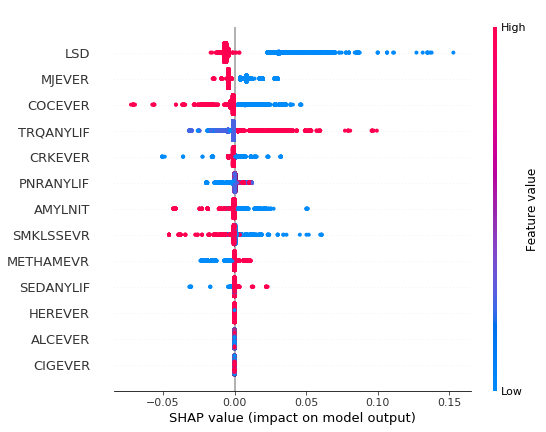

In [72]:
shap.summary_plot(shap_values, X)

The SHAP summary plot tells us which features have the most impact on predicting the model output. As many of the other features are related to sepcific drug use, we can see some rather interesting and important connections to certain recreational drugs (more on this in the conclusion)

In [73]:
shap.force_plot(explainer.expected_value, shap_values[:5000], X[:5000])


shap.force_plot is slow for many thousands of rows, try subsampling your data.


Here we can see how a model value pushes the model's decision (from a probabilistic standpoint)

# Ethics & Privacy

Because this was a voluntary survey, ethics and privacy did not play a huge role; however, the idea that it was a voluntary survey did. The first concern is regarding our dataset - the dataset itself is incredibly thorough. Although we had only used several columns of the 2500+, many of the questions dealt with youth experiences, income, mental illness history, arrest history, etc which some may consider an invasion of their privacy. However, because the survey was administered and required voluntary action to complete it, we can hope that the individuals who took the survey were comfortable with doing so. It should be noted, though, that many of the more private questions were left blank, which may skew results. Another concern is the fact that the survey was voluntary - there could be a large proportion of the population that simply did not do the survey; maybe they were busy working multiple jobs (could hide individuals in the low income bracket), or did not want to admit they had an addiction to drug use. The fact that the survey was voluntary could lead to some bias in our results, and not be indicative of the entire population. Similarly, individuals could also have lied about their answers to some of the questions. In conclusion, ethics and privacy may not have played a huge part to this research question because our dataset was an administered survey that required individuals to voluntarily answer; however, because of the nature of the survey and the questions it entailed, may have skewed results in the dataset itself, or not be indicative of the American population. 


# Conclusion & Discussion

<b> Conclusion </b> <br>
As our question was to figure out what features and attributes of an individual were most related to adderall use, our strategy was to look for interesting leads through exploratory data analysis and visualizations, and then investigate further through modeling. By model feature decompisition, we were able to discern what features were most predictive (and thus correlated) to our target. 

When considering features that hold predictive power (e.g. variance) for determining if someone is an adderall user, use of other drugs trumped demographic features. As seen by some of our exploratory data visualizations, demographics were relatively balanced, with the (white, male, adderall user) records being proportional to how many of such demographic took the survey.

We can see that traditional linear predictive models are almost completely useless, despite their high accuracy. Since the "adderall user" group is such a small minority of our set, any binary classifier would get high accuracy. The real thing that we want to look at is the recall and F1-score. SVM was not performant in any sense of the word, but ensemble learning gave us pretty strong predictive power. We were able to predict roughly half of the adderall users in a holdout test set with the features seen in the `Prediction` section. 

We found that LSD is the most positively correlated feature with Adderall, with an extremely strong SHAP force plot, and cocaine is one of the most negatively correlated features. Therefore, LSD users are likely to be adderall users, and cocaine users are not so likely. Both negative and positive correlation is able to give us insight. However, we would like to specifically note that adderall use is not tied to "hard drug use", in that someone that does more "hard" (e.g. more illegal and rare) drugs is more likely to be an adderall user. In fact, one of the least predictive features is heroine use, where it tells us nothing. Our ensemble methods were not able to discern any sort of bias between the overlap between populations. In addition, as one would expect, the most common drugs (alcohol, nicotine) are also not predictive features.

We can safely deduce that there is an important correlation between other drugs used and the use of adderall, and LSD in particular is one that could be investigated further still - if more complex data on LSD users could be found. Our model was able to find roughly half of the adderall users in the test set, but without a monstrous number of false positives. Only roughly 1% (actually this 0.62% but classification_report rounds up) of non-adderall users were mis-categorized. 

In conclusion, through our entire project, we were able to build a strong false-positive resistant model for finding adderall users. This could prove incredibly useful in culling lists of adderall suspects, due to the high precision. However, this is difficult to argue as ethical, so the use of this model for such a thing should be a preliminary-stage thing only. 

Though not relevant to our research question, something else we found from decomposing the model is that marijuana does in fact have a very strong correlation to adderall use, giving a little more credence to the ever-more-unpopular claim that marijuana is a gateway drug. We have no personal stance on either side, but thought it was interesting to note.


<b> Limitations </b> <br>
There were several limitations to our research question. First, we had issues finding a data source on drug use because 1) most drug surveys are voluntary, so our results may be skewed 2) there wasn't much raw data we could find (mainly preprocessed data on pamphlets and such) and 3) the data set we did find wasn't specific to Adderall usage. Although this wasn't necessarily a huge issue, we found that in our dataset, the amount of individuals who admitted to using Adderall was around only 2%. Furthermore, because our dataset was so large, we had to manually go through 2500+ columns and decide which variables we thought would have been best; obviously, doing so can lead to much human error - what if there was a different variable that was more correlated to our topic at hand that we simply didn't look at?
Finally, I think our biggest issue was that our question was so specific to Adderall usage (out of all stimulants) for college students (out of all the population), but some of our initial analysis wasn't targeted toward that topic/population - the dataset we used wasn't geared toward Adderall users, or college students even, but the general population, which made it difficult for us. However, this again ties back to the fact that such a small proportion of our dataset exhibited the pattern of behavior we were looking for. Furthermore, avoiding target leak was difficult, as the feature names were not very descriptive, and again, due to the sheer number we had. Therefore, both due to lack of compute power and the wish to avoid target leak, only a small subset of the features were able to be used.

In addition, it was difficult to train a performant model for minority cases, since we had a relatively small subset of data that was our "adderall use" label. We could've resolved this easily with access to more data, as mentioned above, but the stopgap solution is with more complex hyperparameter tuning. However, with both XGBoost and Random Forest, training the model becomes relatively slow - limiting our ability to do this in scale. Additionally, since we did not have more detailed context to the study, eliminating possible bias in the dataset was difficult to approach, but we ultimately deemed that it was a non-issue when considered in context of the whole dataset. 

<b> Impact to Society </b> <br>
There are multiple layers of impact to society. First, it is important to bring this topic up for discussion to begin with - as students ourselves, we understand that it’s easy to rationalize why individuals take Adderall: it helps brings up grades, helps you stay up at night doing work, etc, but although it isn’t a very well addressed issue, it is still a very prevalent topic, especially as we have seem Adderall usage in students increase. Moreover, being able to predict which variables could help determine whether or not a student uses Adderall could be helpful on an individual level: if students know what to look for, maybe demographic wise, or previous drug use wise, they could help their peers who might be at risk of adderall addiction. Through our data visualizations, we can see which age groups mainly take adderall, as well as which college students/which grade they are in. 
Although our dataset was huge, and there were many issues that could have been delved deeper into, we believe that it was beneficial both for us and whoever may look at this project to really delve into Adderall usage. Not only does it affect us as students on a personal level, but we feel that Adderall is a drug that is often looked past, thrown under the rug, and not really addressed. 

On a much larger scale, if there are variables that could be found (demographic variables, location, groups of individuals at-risk), programs could be  put in place to help at-risk individuals who may be susceptible to Adderall abuse (eg. infographics placed on college campuses) to help prevent the ever growing number of Adderall users.

# Team Contributions

<b> Steven Siddall: </b>  Found the dataset, searched codebook for important variables, wrote compAdderallOVerall function and accompanying markdown for value meanings on each call<br>
<b>Pramaan Gour: </b> Identified variables in dataset that suited project, worked on data visualization that linked education and adderall usage<br>
<b>Minjoo Kim: </b> Wrote overview, worked on background research/hypothesis/research question, did preliminary data cleaning, wrote cleaning explanations, did SVM model, wrote ethics and privacy, limitations, and impact to society <br>
<b>Eric Kang: </b>wrote conclusion, helped Minjoo write limitations and do SVM model, did all XGBoost and Random Forest model composition, did all shape analysis <br> 
<b>Matthew Whiting: </b> Helped find important and relevant variables in the code book, visualized and cleaned data regarding college students, ages, and adderall usage, wrote analysis and descriptions of visualized data. <br>